In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("DataAnalyst_Assesment_Dataset.xlsx")
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [3]:
# no insights can be drawn from Booking ID, Customer ID, Name, Email, Number. 
#Service Type is very similar to Booking Type so it can be dropped
columns_to_drop = ["Booking ID", "Customer ID", "Customer Name","Subscription Type", "Service Type","Customer Email", "Customer Phone"]
df = df.drop(columns=columns_to_drop)
#df.head()

In [4]:
print("No of Null Values in each coloumn")
df.isnull().sum()

No of Null Values in each coloumn


Booking Type         0
Booking Date         0
Status               0
Class Type         672
Instructor         730
Time Slot          205
Duration (mins)    205
Price                0
Facility           328
Theme              727
Service Name         0
dtype: int64

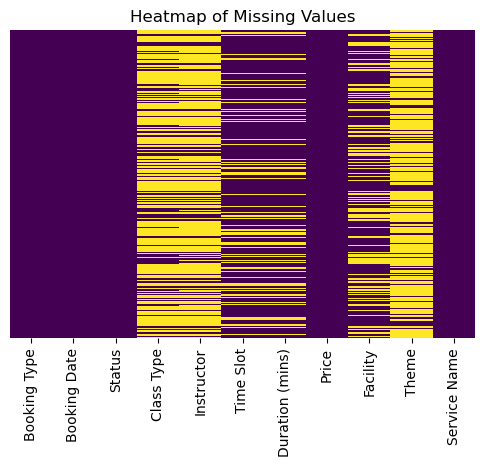

In [5]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)  # Plot heatmap with null values
plt.title("Heatmap of Missing Values")  # Add title
plt.show()  # Display the plot


In [6]:
# Fill missing values in 'Duration (mins)' with the mode
df["Duration (mins)"].fillna(df["Duration (mins)"].mode()[0], inplace=True)


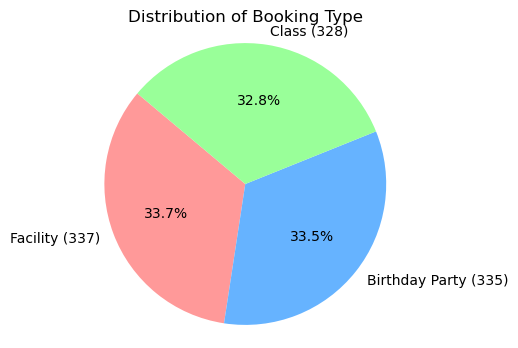

In [7]:
import matplotlib.pyplot as plt

# Get value counts for 'Booking Type'
booking_counts = df["Booking Type"].value_counts()

# Create pie chart with count labels
plt.figure(figsize=(4, 4))
plt.pie(booking_counts, labels=[f"{label} ({count})" for label, count in zip(booking_counts.index, booking_counts.values)],
        autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Distribution of Booking Type")
plt.axis("equal")  # Ensures the pie is drawn as a circle
plt.show()


In [8]:
print("Booking Status")
df["Status"].value_counts()

Booking Status


Pending      510
Confirmed    490
Name: Status, dtype: int64

In [9]:
print("Count for different services provided")
df["Service Name"].value_counts()

Count for different services provided


Play Area     356
Party Room    316
Gymnastics    111
Art           110
Dance         107
Name: Service Name, dtype: int64

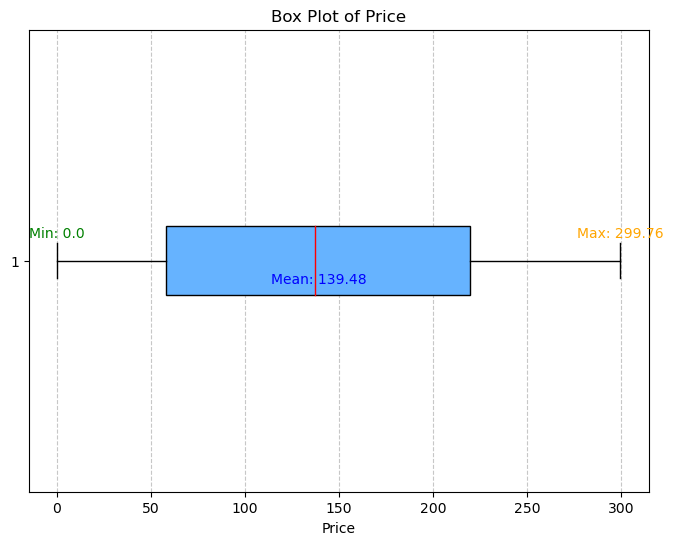

In [10]:
# Create a box plot for 'Price'
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df["Price"].dropna(), vert=False, patch_artist=True,
                      boxprops=dict(facecolor="#66b3ff", color="black"),
                      medianprops=dict(color="red"))

# Calculate statistics
price_min = df["Price"].min()
price_max = df["Price"].max()
price_mean = df["Price"].mean()

# Plot labels for min, max, and mean
plt.text(price_min, 1.05, f"Min: {price_min}", ha="center", fontsize=10, color="green")
plt.text(price_max, 1.05, f"Max: {price_max}", ha="center", fontsize=10, color="orange")
plt.text(price_mean, 0.95, f"Mean: {price_mean:.2f}", ha="center", fontsize=10, color="blue")

# Add title and labels
plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [11]:
print("Booking Status with respect to price: \n")
# Calculate the 50th percentile (median) of Price
price_median = df["Price"].median()

# Create two subsets: below and above 50th percentile
below_50_df = df[df["Price"] <= price_median]
above_50_df = df[df["Price"] > price_median]

# Count statuses for below 50th percentile
below_50_status_counts = below_50_df["Status"].value_counts().rename("Below 50th Percentile")

# Count statuses for above 50th percentile
above_50_status_counts = above_50_df["Status"].value_counts().rename("Above 50th Percentile")

# Combine results into a single DataFrame
result_df = pd.concat([below_50_status_counts, above_50_status_counts], axis=1).fillna(0)

# Display the results
print(result_df)


Booking Status with respect to price: 

           Below 50th Percentile  Above 50th Percentile
Pending                      252                    258
Confirmed                    248                    242


# Time Based Analysis

In [12]:
# Convert 'Booking Date' to datetime format with correct format
df["Booking Date"] = pd.to_datetime(df["Booking Date"])


In [13]:
df["Month"] = df["Booking Date"].dt.month
df["Day"] = df["Booking Date"].dt.day

In [14]:
df["Month"].value_counts().sort_index()

3     84
4    334
5    334
6    248
Name: Month, dtype: int64

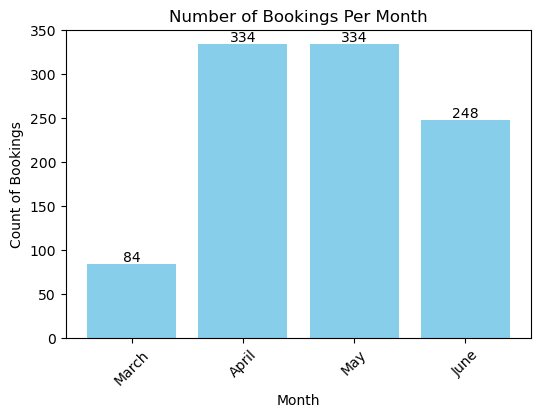

In [30]:
import matplotlib.pyplot as plt

# Data for Month value counts
month_counts = df["Month"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(month_counts.index, month_counts.values, color="skyblue", width=0.8)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize plot
plt.title("Number of Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Bookings")
plt.xticks(
    ticks=[3, 4, 5, 6],
    labels=["March", "April", "May", "June"],
    rotation=45,
)
plt.show()


In [16]:
import pandasql as psql

# Query to create Facility table
facility_df = psql.sqldf("SELECT * FROM df WHERE [Booking Type] = 'Facility'", locals())

# Query to create Birthday Party table
birthday_df = psql.sqldf("SELECT * FROM df WHERE [Booking Type] = 'Birthday Party'", locals())

# Query to create Class table
class_df = psql.sqldf("SELECT * FROM df WHERE [Booking Type] = 'Class'", locals())

# Facility Table Analysis

In [17]:
facility_df.shape

(337, 13)

In [18]:
print("No of missing values in each coloumn")
facility_df.isnull().sum()

No of missing values in each coloumn


Booking Type         0
Booking Date         0
Status               0
Class Type         337
Instructor         337
Time Slot           64
Duration (mins)      0
Price                0
Facility             0
Theme              337
Service Name         0
Month                0
Day                  0
dtype: int64

In [19]:
#dropping empty coloumns 
facility_df.drop(["Class Type", "Instructor", "Theme"], axis=1, inplace = True)

In [20]:
print("Booking Status: ")
facility_df["Status"].value_counts()

Booking Status: 


Pending      186
Confirmed    151
Name: Status, dtype: int64

In [21]:
facility_df["Facility"].value_counts()

Play Area     191
Party Room    146
Name: Facility, dtype: int64

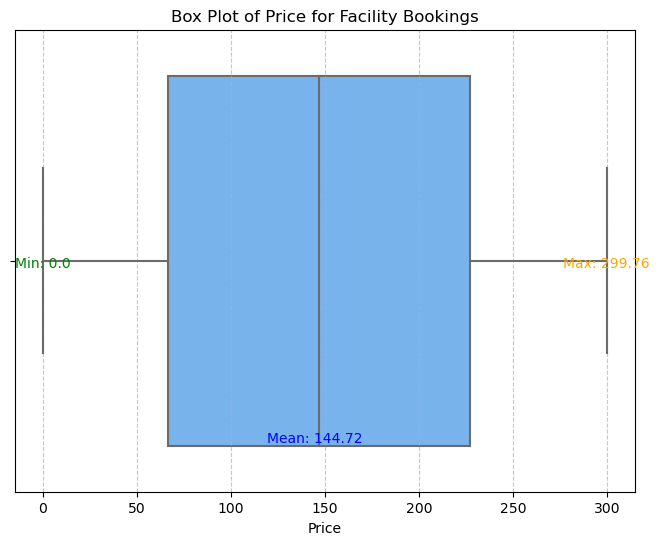

In [22]:
# Create a box plot for 'Price' in facility_df
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x=facility_df["Price"], color="#66b3ff")

# Calculate statistics
price_min = facility_df["Price"].min()
price_max = facility_df["Price"].max()
price_mean = facility_df["Price"].mean()

# Plot labels for min, max, and mean
plt.text(price_min, 0.02, f"Min: {price_min}", ha="center", va="bottom", fontsize=10, color="green")
plt.text(price_max, 0.02, f"Max: {price_max}", ha="center", va="bottom", fontsize=10, color="orange")
plt.text(price_mean, 0.4, f"Mean: {price_mean:.2f}", ha="center", va="bottom", fontsize=10, color="blue")

# Add title and labels
plt.title("Box Plot of Price for Facility Bookings")
plt.xlabel("Price")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [23]:
print("No of bookings for each type of Duration: ")
facility_df["Duration (mins)"].value_counts()

No of bookings for each type of Duration: 


90.0     154
45.0      98
120.0     85
Name: Duration (mins), dtype: int64

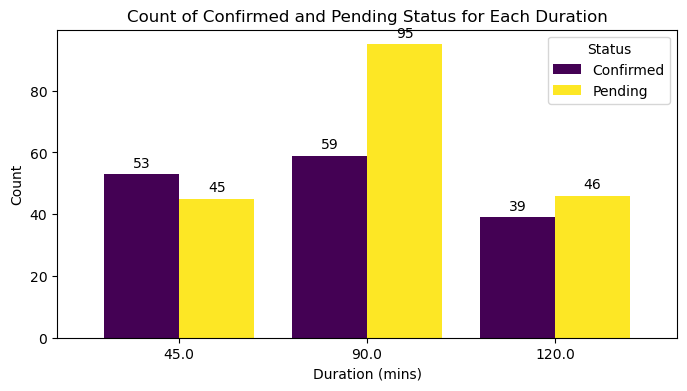

In [31]:
# Group data by 'Duration (mins)' and 'Status' and count the occurrences
duration_status_df = facility_df.groupby(["Duration (mins)", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = duration_status_df.plot(kind="bar", stacked=False, figsize=(8, 4), colormap="viridis", width=0.8)
plt.title("Count of Confirmed and Pending Status for Each Duration")
plt.xlabel("Duration (mins)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


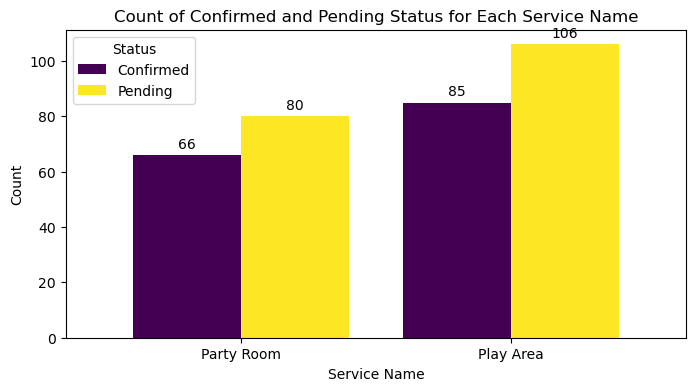

In [32]:
# Group data by 'Service Name' and 'Status' and count the occurrences
service_status_df = facility_df.groupby(["Service Name", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = service_status_df.plot(kind="bar", stacked=False, figsize=(8, 4), colormap="viridis", width=0.8)
plt.title("Count of Confirmed and Pending Status for Each Service Name")
plt.xlabel("Service Name")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    labels = [f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


In [25]:
print("Booking Status when the Price is 0")
# Filter rows where Price is 0
price_zero_df = facility_df[facility_df["Price"] == 0]

# Get the count of statuses where Price is 0
status_counts = price_zero_df["Status"].value_counts()

# Display the results
status_counts


Booking Status when the Price is 0


Confirmed    21
Pending      16
Name: Status, dtype: int64

In [26]:
print("Booking Status with respect to price: \n")
# Calculate the 50th percentile (median) of Price
price_median = facility_df["Price"].median()

# Create two subsets: below and above 50th percentile
below_50_df = facility_df[facility_df["Price"] <= price_median]
above_50_df = facility_df[facility_df["Price"] > price_median]

# Count statuses for below 50th percentile
below_50_status_counts = below_50_df["Status"].value_counts().rename("Below 50th Percentile")

# Count statuses for above 50th percentile
above_50_status_counts = above_50_df["Status"].value_counts().rename("Above 50th Percentile")

# Combine results into a single DataFrame
result_df = pd.concat([below_50_status_counts, above_50_status_counts], axis=1).fillna(0)

# Display the results
print(result_df)


Booking Status with respect to price: 

           Below 50th Percentile  Above 50th Percentile
Pending                       96                     90
Confirmed                     73                     78


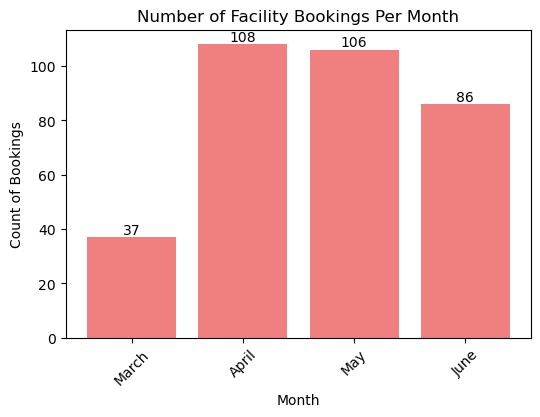

In [33]:
# Data for Month value counts in facility_df
facility_month_counts = facility_df["Month"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(
    facility_month_counts.index, facility_month_counts.values, color="lightcoral", width=0.8
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize plot
plt.title("Number of Facility Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Bookings")
plt.xticks(
    ticks=[3, 4, 5, 6],
    labels=["March", "April", "May", "June"],
    rotation=45,
)
plt.show()


# Birthday Party Table Analysis

In [63]:
birthday_df.shape

(335, 11)

In [37]:
print("Booking Status: ")
birthday_df["Status"].value_counts()

Booking Status: 


Pending      168
Confirmed    167
Name: Status, dtype: int64

In [41]:
birthday_df["Theme"].value_counts()

Superhero    94
Sports       93
Princess     86
Name: Theme, dtype: int64

In [42]:
birthday_df["Service Name"].value_counts()

Party Room    170
Play Area     165
Name: Service Name, dtype: int64

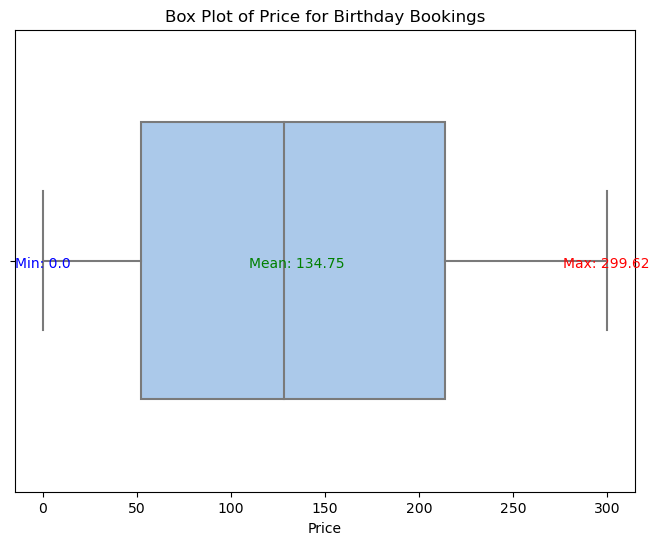

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Price' column in birthday_df
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x=birthday_df["Price"], width=0.6, palette="pastel")

# Get statistical values
price_min = birthday_df["Price"].min()
price_max = birthday_df["Price"].max()
price_mean = birthday_df["Price"].mean()

# Add labels for min, mean, and max
plt.text(price_min, 0.02, f"Min: {price_min}", ha="center", va="bottom", fontsize=10, color="blue")
plt.text(price_mean, 0.02, f"Mean: {price_mean:.2f}", ha="center", va="bottom", fontsize=10, color="green")
plt.text(price_max, 0.02, f"Max: {price_max}", ha="center", va="bottom", fontsize=10, color="red")

# Plot Title and Labels
plt.title("Box Plot of Price for Birthday Bookings")
plt.xlabel("Price")
plt.show()


In [60]:
print("No of bookings for each type of Duration: ")
birthday_df["Duration (mins)"].value_counts()

No of bookings for each type of Duration: 


90.0     93
45.0     85
120.0    82
Name: Duration (mins), dtype: int64

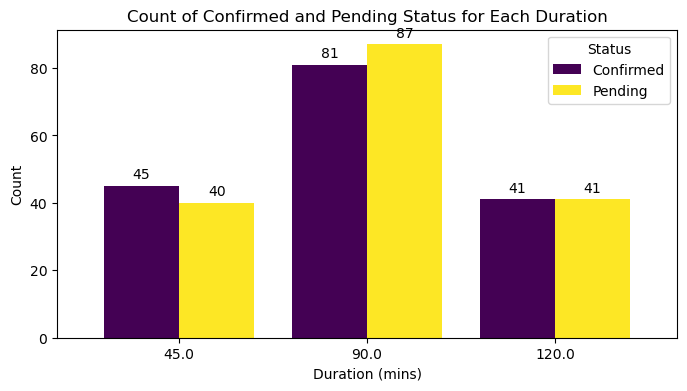

In [44]:
# Group data by 'Duration (mins)' and 'Status' and count the occurrences
duration_status_df = birthday_df.groupby(["Duration (mins)", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = duration_status_df.plot(kind="bar", stacked=False, figsize=(8, 4), colormap="viridis", width=0.8)
plt.title("Count of Confirmed and Pending Status for Each Duration")
plt.xlabel("Duration (mins)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


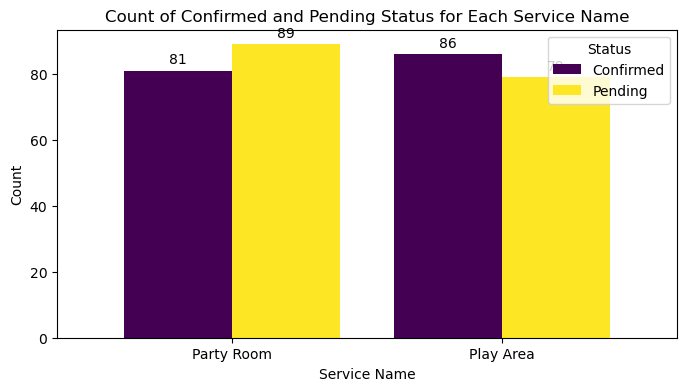

In [34]:
# Group data by 'Service Name' and 'Status' and count the occurrences
service_status_df = birthday_df.groupby(["Service Name", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = service_status_df.plot(kind="bar", stacked=False, figsize=(8, 4), colormap="viridis", width=0.8)
plt.title("Count of Confirmed and Pending Status for Each Service Name")
plt.xlabel("Service Name")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    labels = [f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


In [34]:
print("Booking Status when the Price is 0")
# Filter rows where Price is 0
price_zero_df = birthday_df[birthday_df["Price"] == 0]

# Get the count of statuses where Price is 0
status_counts = price_zero_df["Status"].value_counts()

# Display the results
status_counts

Booking Status when the Price is 0


Confirmed    25
Pending      15
Name: Status, dtype: int64

In [61]:
print("Booking Status with respect to price: \n")
# Calculate the 50th percentile (median) of Price for birthday_df
price_median_birthday = birthday_df["Price"].median()

# Create two subsets: below and above 50th percentile
below_50_birthday_df = birthday_df[birthday_df["Price"] <= price_median_birthday]
above_50_birthday_df = birthday_df[birthday_df["Price"] > price_median_birthday]

# Count statuses for below 50th percentile
below_50_birthday_status_counts = below_50_birthday_df["Status"].value_counts().rename("Below 50th Percentile")

# Count statuses for above 50th percentile
above_50_birthday_status_counts = above_50_birthday_df["Status"].value_counts().rename("Above 50th Percentile")

# Combine results into a single DataFrame
birthday_result_df = pd.concat([below_50_birthday_status_counts, above_50_birthday_status_counts], axis=1).fillna(0)

# Display the results
print(birthday_result_df)


Booking Status with respect to price: 

           Below 50th Percentile  Above 50th Percentile
Confirmed                     88                     79
Pending                       80                     88


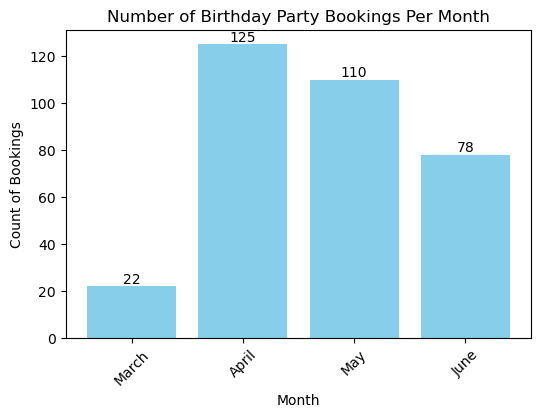

In [35]:
# Data for Month value counts in birthday_df
birthday_month_counts = birthday_df["Month"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(
    birthday_month_counts.index, birthday_month_counts.values, color="skyblue", width=0.8
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize plot
plt.title("Number of Birthday Party Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Bookings")
plt.xticks(
    ticks=[3, 4, 5, 6],
    labels=["March", "April", "May", "June"],
    rotation=45,
)
plt.show()


# Class Table Analysis

In [64]:
class_df.shape

(328, 11)

In [36]:
print("Booking Status: ")
class_df["Status"].value_counts()

Booking Status: 


Confirmed    172
Pending      156
Name: Status, dtype: int64

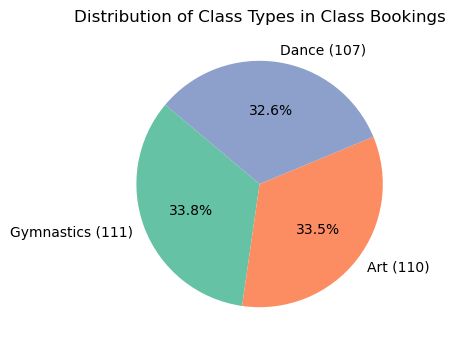

In [59]:
# Count occurrences of each Class Type
class_type_counts = class_df["Class Type"].value_counts()

# Create a pie chart with labels and count values
plt.figure(figsize=(4, 4))
plt.pie(class_type_counts, labels=[f"{label} ({count})" for label, count in zip(class_type_counts.index, class_type_counts)],
        autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set2", len(class_type_counts)))

# Set plot title
plt.title("Distribution of Class Types in Class Bookings")
plt.show()


In [62]:
print("No of bookings for each type of Duration: ")
class_df["Duration (mins)"].value_counts()

No of bookings for each type of Duration: 


90.0     100
120.0     81
45.0      81
Name: Duration (mins), dtype: int64

In [59]:
class_df["Instructor"].value_counts()

Amanda Davis    90
Lisa Hensley    90
James Howard    90
Name: Instructor, dtype: int64

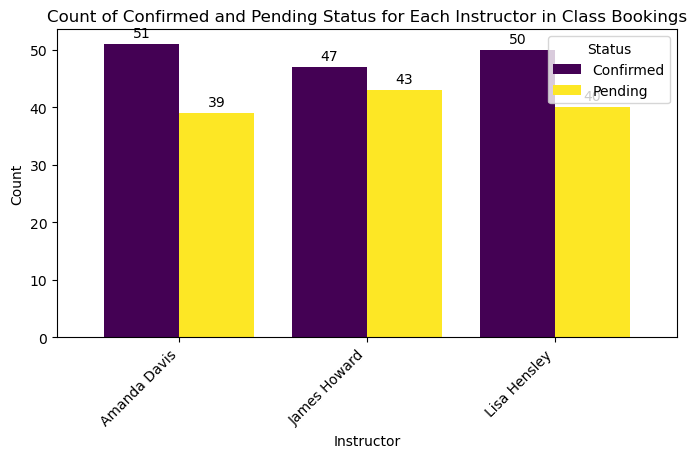

In [36]:
# Group data by 'Instructor' and 'Status' and count the occurrences
instructor_status_df = class_df.groupby(["Instructor", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = instructor_status_df.plot(kind="bar", stacked=False, figsize=(8, 4), colormap="viridis", width=0.8)
plt.title("Count of Confirmed and Pending Status for Each Instructor in Class Bookings")
plt.xlabel("Instructor")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    labels = [f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


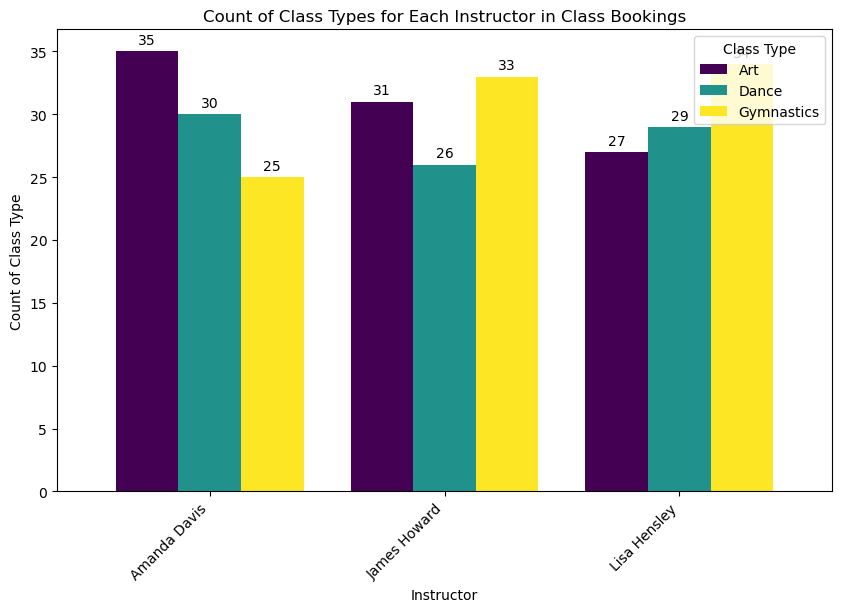

In [40]:
# Group data by 'Instructor' and 'Class Type' and count occurrences
instructor_class_df = class_df.groupby(["Instructor", "Class Type"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = instructor_class_df.plot(kind="bar", stacked=False, figsize=(10, 6), colormap="viridis", width=0.8)
plt.title("Count of Class Types for Each Instructor in Class Bookings")
plt.xlabel("Instructor")
plt.ylabel("Count of Class Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class Type")

# Add labels for each bar
for container in ax.containers:
    labels = [f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


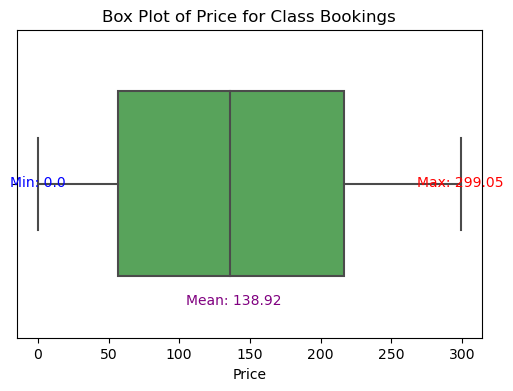

In [49]:
# Create a box plot for the 'Price' column in class_df
plt.figure(figsize=(6, 4))
boxplot = sns.boxplot(x=class_df["Price"], width=0.6, color="#4CAF50")
plt.title("Box Plot of Price for Class Bookings")
plt.xlabel("Price")

# Calculate statistical values
price_min = class_df["Price"].min()
price_max = class_df["Price"].max()
price_mean = class_df["Price"].mean()

# Add labels for min, max, and mean
plt.text(price_min, 0.02, f"Min: {price_min}", ha="center", va="bottom", fontsize=10, color="blue")
plt.text(price_max, 0.02, f"Max: {price_max}", ha="center", va="bottom", fontsize=10, color="red")
plt.text(price_mean, 0.4, f"Mean: {price_mean:.2f}", ha="center", va="bottom", fontsize=10, color="purple")

# Show the plot
plt.show()


In [57]:
print("Booking Status with respect to price: \n")
# Calculate the 50th percentile (median) of Price for class_df
price_median_class = class_df["Price"].median()

# Create two subsets: below and above 50th percentile
below_50_class_df = class_df[class_df["Price"] <= price_median_class]
above_50_class_df = class_df[class_df["Price"] > price_median_class]

# Count statuses for below 50th percentile
below_50_class_status_counts = below_50_class_df["Status"].value_counts().rename("Below 50th Percentile")

# Count statuses for above 50th percentile
above_50_class_status_counts = above_50_class_df["Status"].value_counts().rename("Above 50th Percentile")

# Combine results into a single DataFrame
class_result_df = pd.concat([below_50_class_status_counts, above_50_class_status_counts], axis=1).fillna(0)

# Display the results
print(class_result_df)


Booking Status with respect to price: 

           Below 50th Percentile  Above 50th Percentile
Confirmed                     84                     88
Pending                       80                     76


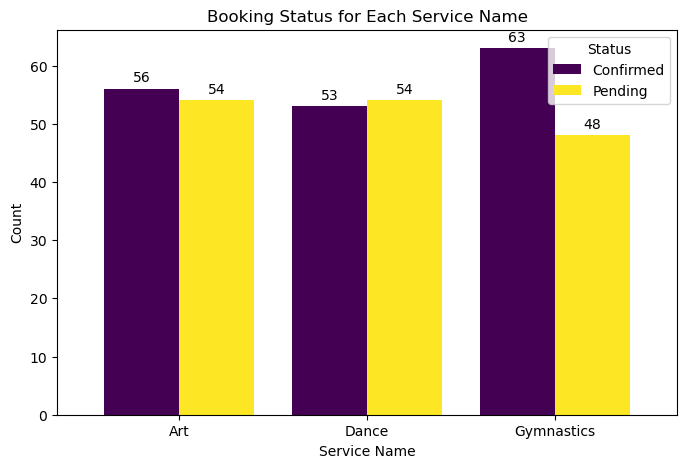

In [47]:
# Group data by 'Service Name' and 'Status' and count the occurrences
service_status_df = class_df.groupby(["Service Name", "Status"]).size().unstack().fillna(0)

# Plot a side-by-side bar plot
ax = service_status_df.plot(kind="bar", stacked=False, figsize=(8, 5), colormap="viridis", width=0.8)
plt.title("Booking Status for Each Service Name")
plt.xlabel("Service Name")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Status")

# Add labels for each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

# Show the plot
plt.show()


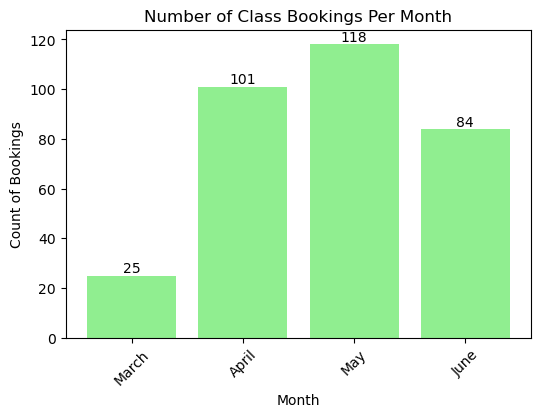

In [37]:
# Data for Month value counts in class_df
class_month_counts = class_df["Month"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(
    class_month_counts.index, class_month_counts.values, color="lightgreen", width=0.8
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize plot
plt.title("Number of Class Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Bookings")
plt.xticks(
    ticks=[3, 4, 5, 6],
    labels=["March", "April", "May", "June"],
    rotation=45,
)
plt.show()


## 

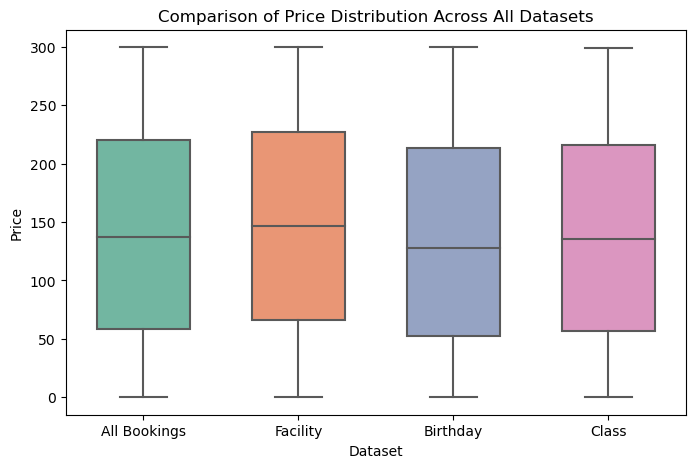

In [48]:
# Create a combined box plot for Price from all datasets
plt.figure(figsize=(8, 5))

# Add box plots for each dataset
sns.boxplot(data=[df["Price"], facility_df["Price"], birthday_df["Price"], class_df["Price"]],
            width=0.6, palette="Set2")

# Set plot title and labels
plt.title("Comparison of Price Distribution Across All Datasets")
plt.xlabel("Dataset")
plt.ylabel("Price")

# Set x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=["All Bookings", "Facility", "Birthday", "Class"])

# Show the plot
plt.show()


In [43]:
# Save all datasets in a single Excel file with multiple sheets
output_path = "Final_Combined_Dataset.xlsx"
with pd.ExcelWriter(output_path) as writer:
    df.to_excel(writer, sheet_name="Main Dataset", index=False)
    facility_df.to_excel(writer, sheet_name="Facility Booking", index=False)
    birthday_df.to_excel(writer, sheet_name="Birthday Booking", index=False)
    class_df.to_excel(writer, sheet_name="Class Booking", index=False)

print(f"All datasets have been combined and saved at: {output_path}")


All datasets have been combined and saved at: Final_Combined_Dataset.xlsx
